In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set_style('white')

In [82]:
matplotlib.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15.0,
    'axes.titlepad': 8.0,
    'axes.titleweight': 'bold',
})

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(data_id=42165, as_frame=True, return_X_y=True)

# Select only a subset of features of X to make the example faster to run
categorical_columns_subset = [
    "BldgType",
    "GarageFinish",
    "LotConfig",
    "Functional",
    "MasVnrType",
    "HouseStyle",
    "FireplaceQu",
    "ExterCond",
    "ExterQual",
    "PoolQC",
]

numerical_columns_subset = [
    "3SsnPorch",
    "Fireplaces",
    "BsmtHalfBath",
    "HalfBath",
    "GarageCars",
    "TotRmsAbvGrd",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "GrLivArea",
    "ScreenPorch",
]

X = X[categorical_columns_subset + numerical_columns_subset]

In [6]:
correlations = []
for col in numerical_columns_subset:
    correlations.append(np.corrcoef(X[col], y)[0, 1])

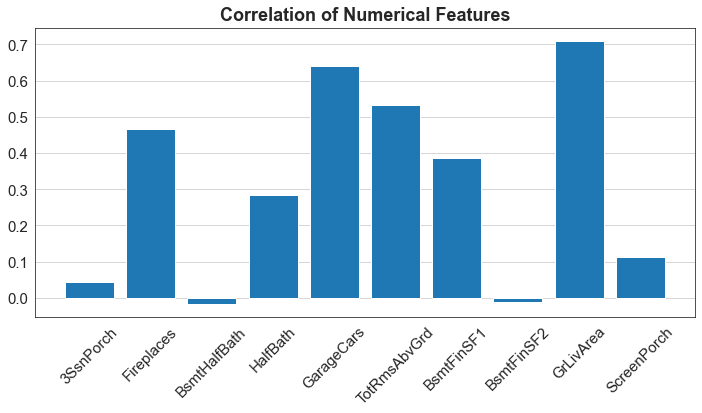

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(numerical_columns_subset)), height=correlations)
plt.grid(axis='y', linestyle='-')
plt.title('Correlation of Numerical Features')
_ = plt.xticks(np.arange(len(numerical_columns_subset)), numerical_columns_subset, rotation=45)
plt.tight_layout()
plt.savefig('correlation.png')

In [19]:
bin_edges = np.linspace(y.min(), y.max(), 11)
bin_y = np.digitize(y, bin_edges)

In [72]:
def mutual_information(x, y):
    unique_x = np.unique(x)
    keymap_x = {k: i for i, k in enumerate(unique_x)}
    unique_y = np.unique(y)
    keymap_y = {k: i for i, k in enumerate(unique_y)}
    p_xy = np.zeros((len(unique_x), len(unique_y)))
    p_x = np.zeros(len(unique_x))
    p_y = np.zeros(len(unique_y))
    
    for vx, vy in zip(x, y):
        i = keymap_x[vx]
        j = keymap_y[vy]
        p_xy[i, j] += 1
        p_x[i] += 1
        p_y[j] += 1
    
    p_xy = p_xy / p_xy.sum()
    p_x = p_x / p_x.sum()
    p_y = p_y / p_y.sum()
    
    mut_info = np.nansum(p_xy * np.log(p_xy / np.outer(p_x, p_y)))
    return mut_info

In [ ]:
X = X.fillna('-1')
informations = []
for col in categorical_columns_subset:
    informations.append(mutual_information(X[col], bin_y))

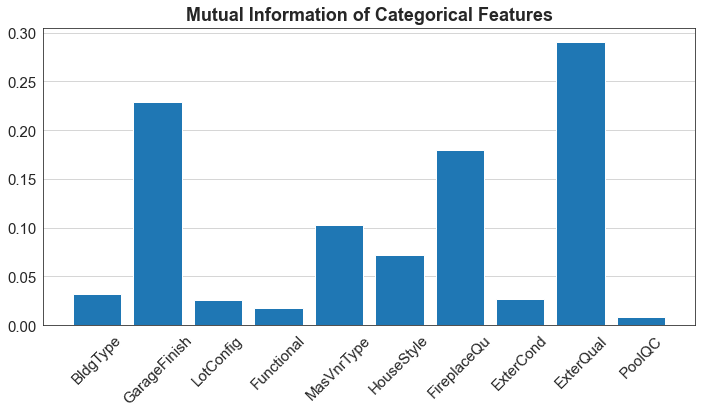

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(categorical_columns_subset)), height=informations)
plt.grid(axis='y', linestyle='-')
plt.title('Mutual Information of Categorical Features')
_ = plt.xticks(np.arange(len(categorical_columns_subset)), categorical_columns_subset, rotation=45)
plt.tight_layout()
plt.savefig('mutual_info.png')